# import pakage

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [20]:
url='https://raw.githubusercontent.com/raginisharma96/rain_prediction/master/cleaned_Data.csv'
df=pd.read_csv(url)
df.head()

,date,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
1,2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2,2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
3,2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
4,2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0


In [21]:
df.drop(['rain'],axis=1,inplace=True)


In [22]:
df.set_index('date',inplace=True)
df.index=pd.DatetimeIndex(df.index)
df.head()

,temp,dew_pt,hum,wind_spd,vis,pressure
date,,,,,,
2018-01-01 02:30:00,69,64,80,2.3,1,29.87
2018-01-01 05:30:00,68,65,87,4.6,1,29.84
2018-01-01 08:30:00,71,64,71,6.9,1,29.92
2018-01-01 11:30:00,79,69,64,4.6,2,29.89
2018-01-01 14:30:00,79,64,51,6.9,2,29.82


In [23]:
#mari kita buang data format detiknya
aggregate_df=df.pivot_table(index=df.index.date)
aggregate_df.head()

,dew_pt,hum,pressure,temp,vis,wind_spd
2018-01-01,65.250000,69.250000,29.861250,73.375000,1.625000,5.175000
2018-01-02,62.500000,68.125000,29.867500,71.625000,1.625000,4.187500
2018-01-03,60.750000,68.250000,29.903750,69.750000,1.625000,3.600000
2018-01-04,65.200000,69.400000,29.936000,73.400000,2.000000,3.460000
2018-01-05,62.428571,73.285714,29.912857,69.714286,1.714286,2.957143


<Axes: >

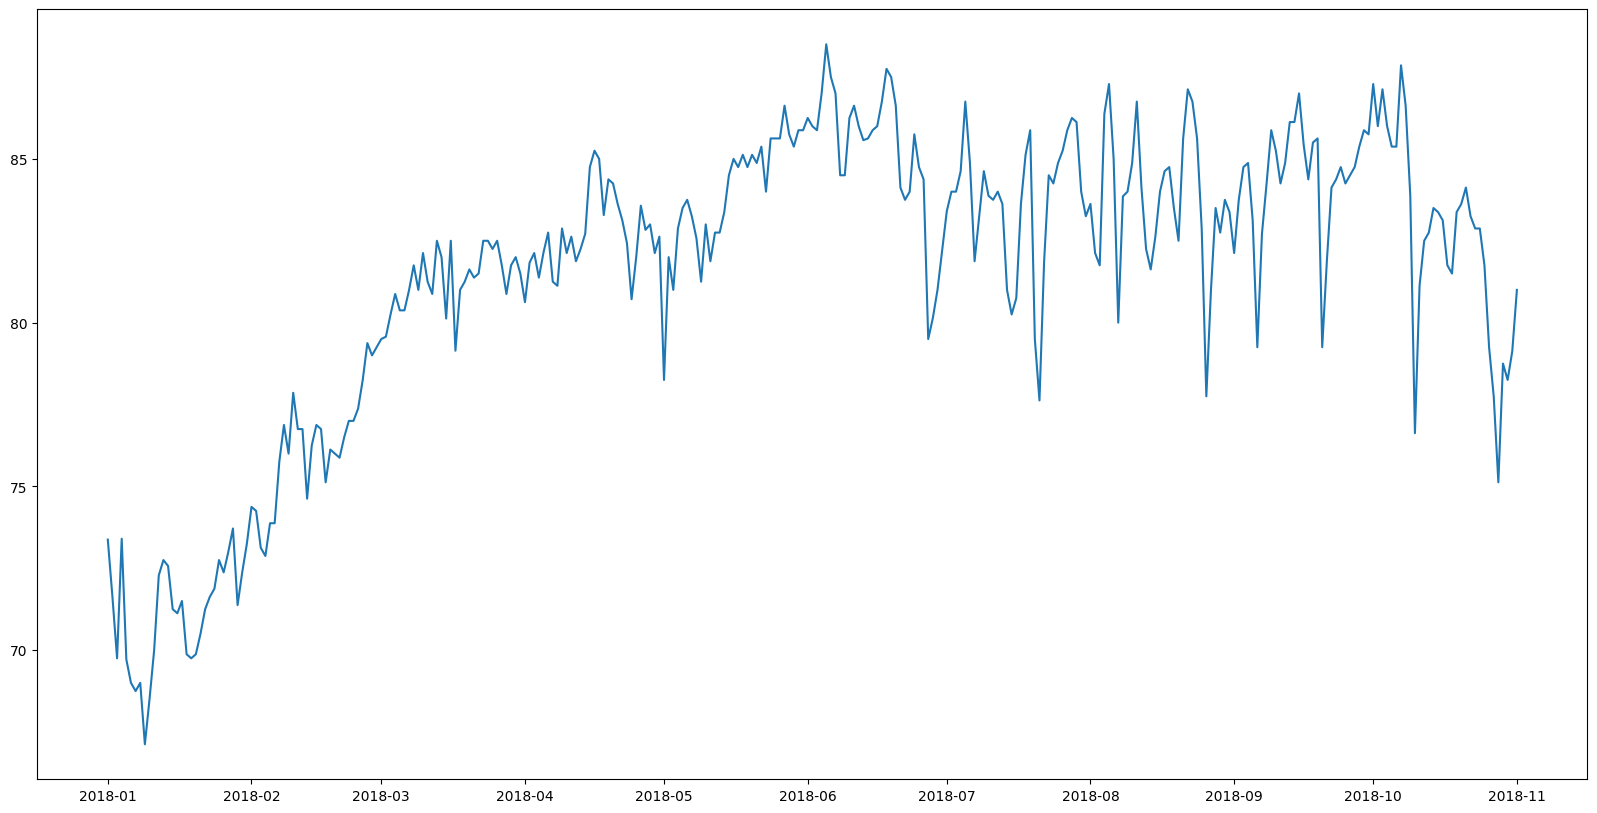

In [28]:
column_list=aggregate_df['temp'].astype(np.float64).tolist()
aggregate_df['temp'].plot(figsize=(20,10))

In [29]:
banyak_train=int(len(column_list)*.7)
banyak_train

212

In [30]:
train,test=column_list[:banyak_train],column_list[banyak_train:]
print(train)
print(test)

[73.375, 71.625, 69.75, 73.4, 69.71428571428571, 69.0, 68.75, 69.0, 67.125, 68.5, 70.0, 72.28571428571429, 72.75, 72.57142857142857, 71.25, 71.125, 71.5, 69.875, 69.75, 69.875, 70.5, 71.25, 71.625, 71.875, 72.75, 72.375, 73.0, 73.71428571428571, 71.375, 72.375, 73.25, 74.375, 74.25, 73.125, 72.875, 73.875, 73.875, 75.75, 76.875, 76.0, 77.85714285714286, 76.75, 76.75, 74.625, 76.25, 76.875, 76.75, 75.125, 76.125, 76.0, 75.875, 76.5, 77.0, 77.0, 77.375, 78.25, 79.375, 79.0, 79.25, 79.5, 79.57142857142857, 80.25, 80.875, 80.375, 80.375, 81.0, 81.75, 81.0, 82.125, 81.25, 80.875, 82.5, 82.0, 80.125, 82.5, 79.14285714285714, 81.0, 81.25, 81.625, 81.375, 81.5, 82.5, 82.5, 82.25, 82.5, 81.75, 80.875, 81.75, 82.0, 81.5, 80.625, 81.83333333333333, 82.125, 81.375, 82.14285714285714, 82.75, 81.25, 81.125, 82.875, 82.125, 82.625, 81.875, 82.25, 82.71428571428571, 84.75, 85.25, 85.0, 83.28571428571429, 84.375, 84.25, 83.625, 83.125, 82.42857142857143, 80.71428571428571, 82.0, 83.57142857142857, 82.8

In [37]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [35]:
predicted_list,error_list=[],[]
training_data=train
training_data

[73.375,
 71.625,
 69.75,
 73.4,
 69.71428571428571,
 69.0,
 68.75,
 69.0,
 67.125,
 68.5,
 70.0,
 72.28571428571429,
 72.75,
 72.57142857142857,
 71.25,
 71.125,
 71.5,
 69.875,
 69.75,
 69.875,
 70.5,
 71.25,
 71.625,
 71.875,
 72.75,
 72.375,
 73.0,
 73.71428571428571,
 71.375,
 72.375,
 73.25,
 74.375,
 74.25,
 73.125,
 72.875,
 73.875,
 73.875,
 75.75,
 76.875,
 76.0,
 77.85714285714286,
 76.75,
 76.75,
 74.625,
 76.25,
 76.875,
 76.75,
 75.125,
 76.125,
 76.0,
 75.875,
 76.5,
 77.0,
 77.0,
 77.375,
 78.25,
 79.375,
 79.0,
 79.25,
 79.5,
 79.57142857142857,
 80.25,
 80.875,
 80.375,
 80.375,
 81.0,
 81.75,
 81.0,
 82.125,
 81.25,
 80.875,
 82.5,
 82.0,
 80.125,
 82.5,
 79.14285714285714,
 81.0,
 81.25,
 81.625,
 81.375,
 81.5,
 82.5,
 82.5,
 82.25,
 82.5,
 81.75,
 80.875,
 81.75,
 82.0,
 81.5,
 80.625,
 81.83333333333333,
 82.125,
 81.375,
 82.14285714285714,
 82.75,
 81.25,
 81.125,
 82.875,
 82.125,
 82.625,
 81.875,
 82.25,
 82.71428571428571,
 84.75,
 85.25,
 85.0,
 83.2857142

In [39]:
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(training_data, order=(7,0,0))
    model_fit = model.fit()
    predicted_value = model_fit.forecast()
    predicted_value = predicted_value[0]
    error_list.append(test[t] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test[t]
    training_data.append(obs)
    print('predicted=%f, expected=%f error=%f' % (predicted_value, obs,abs(predicted_value-obs)))

predicted=84.238787, expected=82.125000 error=2.113787
predicted=82.643386, expected=81.750000 error=0.893386
predicted=82.338164, expected=86.375000 error=4.036836
predicted=85.951968, expected=87.285714 error=1.333747
predicted=86.044727, expected=85.000000 error=1.044727
predicted=84.132724, expected=80.000000 error=4.132724
predicted=80.714131, expected=83.857143 error=3.143011
predicted=84.295190, expected=84.000000 error=0.295190
predicted=84.469999, expected=84.875000 error=0.405001
predicted=84.078130, expected=86.750000 error=2.671870
predicted=86.634908, expected=84.125000 error=2.509908
predicted=82.922355, expected=82.250000 error=0.672355
predicted=82.798291, expected=81.625000 error=1.173291
predicted=82.693515, expected=82.625000 error=0.068515
predicted=83.126384, expected=84.000000 error=0.873616
predicted=84.331903, expected=84.625000 error=0.293097
predicted=84.060790, expected=84.750000 error=0.689210
predicted=83.978795, expected=83.500000 error=0.478795
predicted=

In [40]:
print(error_list)

[-2.113787493002235, -0.8933860663699988, 4.0368363422283124, 1.333746555226213, -1.0447272412019686, -4.132723757487767, 3.143011362336523, -0.29518969599638467, 0.40500094789830143, 2.6718700900466956, -2.5099075878072057, -0.672355376496327, -1.1732905994870748, -0.06851547598792251, 0.8736162261801041, 0.29309749549307185, 0.6892097097096297, -0.4787954060412858, -0.5713261369054834, 2.9728102138907957, 1.6036219554436002, 0.4588152232389717, -0.01966029183066098, -2.269182402504981, -5.255141751561027, 1.378514238225435, 0.36430292848844203, -1.569624221447512, 1.4999309892604913, 0.015095013192237161, 0.20650392222900393, 1.851919041401672, 0.7022374137337692, 0.7028436553658537, -1.2096320696952034, -3.760964638473169, 2.8943110722029246, 0.6040306471778649, 1.5547780797476918, 0.37943835979160667, -0.05285024228331281, 1.987956386456105, 1.2866150424328566, 0.26821872012334325, 1.1700651665286443, -0.9541871646128612, -0.624801528327481, 0.9559913558577762, -0.3416049456498058,

In [42]:
error=mean_squared_error(test,predicted_list)
print("test MSE:%.3f"%error)

test MSE:3.756


In [46]:
model = sm.tsa.arima.ARIMA(train, order=(7,0,0))
model_fit = model.fit()
training_error = model_fit.resid
print("---- Training Error ------\n",training_error)

---- Training Error ------
 [-6.06652343e+00 -2.05113809e+00 -2.33067809e+00  2.81717109e+00
 -4.23161149e+00 -1.32462270e+00 -1.15693304e+00 -9.61366738e-01
 -2.25161292e+00 -8.73490077e-03  1.03675426e+00  2.21902992e+00
  1.28835163e+00  7.30792596e-01 -2.42701888e-01  3.24321369e-02
  8.19597469e-02 -2.19582937e+00 -7.79033655e-01 -6.72564763e-01
  2.58979936e-02  4.86171512e-01  2.61243001e-01  5.91472266e-01
  1.17693202e+00 -6.60760122e-03  8.57855004e-01  8.77007356e-01
 -2.12897829e+00  8.61243329e-01  4.24729890e-01  9.67372759e-01
  2.31745961e-01 -9.27165102e-01  6.05336193e-02  7.02838714e-01
 -2.29790671e-01  1.74015859e+00  1.45001111e+00 -5.90232845e-02
  2.63294253e+00 -5.30307286e-01  4.62655691e-01 -2.01026022e+00
  9.30663175e-01  3.79717856e-01 -4.50303956e-01 -1.32846704e+00
  6.84521743e-01 -1.12569997e-01 -3.89700766e-01  4.96510030e-01
  3.79206177e-01  3.66142155e-01  5.61783407e-01  1.10878755e+00
  1.52141841e+00  2.17714145e-01  7.73977182e-01  6.77863122e-

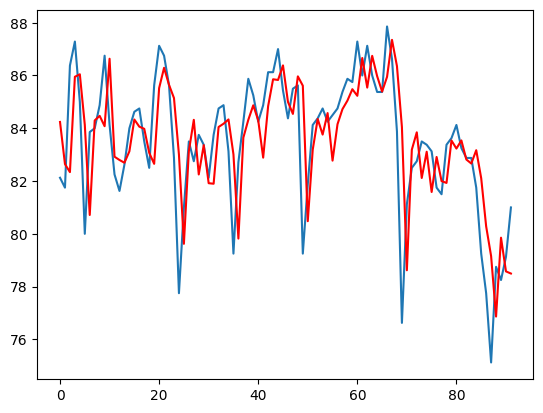

In [48]:
plt.plot(test)
plt.plot(predicted_list,color='r')

# Buat model ANN

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 

In [52]:
model_ann=Sequential()
model_ann.add(Dense(100,input_dim=7,activation='tanh'))
model_ann.add(Dense(50,activation='tanh'))
model_ann.add(Dense(25,activation='tanh'))
model_ann.add(Dense(1))
model_ann.add(Activation('linear'))
model_ann.compile(loss='mean_squared_error',optimizer='adam')


In [53]:
# # train_scaled
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

In [54]:
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

In [57]:
model_ann.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)

Epoch 1/400
15/15 [==============================] - 1s 4ms/step - loss: 2.2669
Epoch 2/400
15/15 [==============================] - 0s 3ms/step - loss: 2.1345
Epoch 3/400
15/15 [==============================] - 0s 3ms/step - loss: 2.0657
Epoch 4/400
15/15 [==============================] - 0s 3ms/step - loss: 2.0061
Epoch 5/400
15/15 [==============================] - 0s 3ms/step - loss: 1.9898
Epoch 6/400
15/15 [==============================] - 0s 3ms/step - loss: 2.0023
Epoch 7/400
15/15 [==============================] - 0s 3ms/step - loss: 1.9210
Epoch 8/400
15/15 [==============================] - 0s 3ms/step - loss: 1.8946
Epoch 9/400
15/15 [==============================] - 0s 3ms/step - loss: 1.8590
Epoch 10/400
15/15 [==============================] - 0s 3ms/step - loss: 1.8327
Epoch 11/400
15/15 [==============================] - 0s 4ms/step - loss: 1.8117
Epoch 12/400
15/15 [==============================] - 0s 3ms/step - loss: 1.7755
Epoch 13/400
15/15 [=================

In [82]:
# test_extended = error_list
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)

In [83]:
test_data = np.array(test_data)

In [84]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

In [85]:
new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

In [87]:
predictions = model_ann.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

3/3 [==============================] - 0s 3ms/step


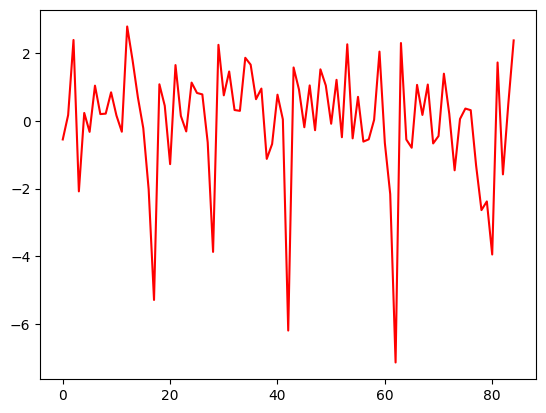

Test MSE: 0.190


In [88]:
plt.plot(predictions , color = 'r')
plt.show()
error = mean_squared_error(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

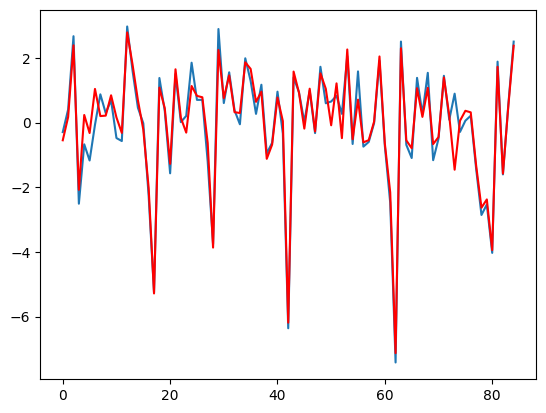

Test MSE: 0.190


In [89]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mean_squared_error(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

In [94]:
error.sum()

0.190029905335128